# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
info = pd.read_csv('heroes_information.csv')
powers = pd.read_csv('super_hero_powers.csv')

In [3]:
info.head(2)

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0


In [4]:
powers.head(2)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [5]:
#dropping unnamed hero(s)
info.drop(columns='Unnamed: 0', inplace=True)
info.head(2)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [6]:
info.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [7]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [8]:
info.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [9]:
info.shape

(734, 10)

In [11]:
info['Publisher'].value_counts()

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
HarperCollins          6
Star Trek              6
SyFy                   5
Team Epic TV           5
Shueisha               4
ABC Studios            4
IDW Publishing         4
Icon Comics            4
Wildstorm              3
Sony Pictures          2
South Park             1
Universal Studios      1
Microsoft              1
J. R. R. Tolkien       1
Titan Books            1
Hanna-Barbera          1
J. K. Rowling          1
Rebellion              1
Name: Publisher, dtype: int64

In [12]:
#treat missing values
info.replace(to_replace='-', value = 'Other Publisher',inplace=True)
info['Publisher'].fillna('Other Pushlisher',inplace=True)

In [13]:
info.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,Other Publisher,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,Other Publisher,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,Other Publisher,bad,-99.0


In [14]:
info.groupby('Publisher')['name'].count().sort_values(ascending=False)

Publisher
Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
Other Pushlisher      15
Image Comics          14
George Lucas          14
Star Trek              6
HarperCollins          6
Team Epic TV           5
SyFy                   5
ABC Studios            4
Shueisha               4
IDW Publishing         4
Icon Comics            4
Wildstorm              3
Sony Pictures          2
J. K. Rowling          1
J. R. R. Tolkien       1
Universal Studios      1
Rebellion              1
Hanna-Barbera          1
South Park             1
Titan Books            1
Microsoft              1
Name: name, dtype: int64

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [15]:
#dealing with nulls in info - checking for nuls first (again)
info.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        2
dtype: int64

In [16]:
info['Publisher'].value_counts()

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
Other Pushlisher      15
George Lucas          14
Image Comics          14
Star Trek              6
HarperCollins          6
Team Epic TV           5
SyFy                   5
Icon Comics            4
Shueisha               4
IDW Publishing         4
ABC Studios            4
Wildstorm              3
Sony Pictures          2
Universal Studios      1
South Park             1
Microsoft              1
J. R. R. Tolkien       1
Titan Books            1
Hanna-Barbera          1
J. K. Rowling          1
Rebellion              1
Name: Publisher, dtype: int64

In [18]:
#Cleaning weight by first converting negative values to none 
info['Weight'] = info['Weight'].map(lambda x: int(x) if x>0 else None)

In [19]:
#then adding the median instead
info['Weight'].fillna(info['Weight'].median(), inplace= True)

In [20]:
info.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [21]:
#same cleaning for height as was doen for weight
info['Height'] = info['Height'].map(lambda x: int(x) if x>0 else None)

In [22]:
info['Height'].fillna(info['Height'].median(), inplace= True)

In [24]:
info['Height']

0      203.0
1      191.0
2      185.0
3      203.0
4      183.0
5      193.0
6      183.0
7      185.0
8      173.0
9      178.0
10     191.0
11     188.0
12     193.0
13     180.0
14     183.0
15     183.0
16     178.0
17     244.0
18     183.0
19     257.0
20     188.0
21     183.0
22     183.0
23     183.0
24     165.0
25     163.0
26     183.0
27     183.0
28     180.0
29     211.0
       ...  
704    183.0
705    185.0
706    180.0
707    188.0
708    173.0
709    218.0
710    163.0
711    183.0
712    183.0
713    183.0
714    178.0
715    183.0
716    175.0
717    140.0
718    366.0
719    160.0
720    165.0
721    188.0
722    183.0
723    183.0
724    196.0
725    155.0
726    175.0
727    188.0
728    183.0
729    165.0
730    304.0
731     66.0
732    170.0
733    185.0
Name: Height, Length: 734, dtype: float64

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [47]:
#inner join
clean_hero = info.merge(powerful_hero, how = 'inner', left_on='name', right_on='hero_names' )
clean_hero.drop('hero_names', axis=1, inplace=True)
clean_hero.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,no_of_powers
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,Other Publisher,good,441.0,7.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,16.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,1.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,Other Publisher,bad,441.0,8.0
4,Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,Other Publisher,bad,81.0,14.0


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [28]:
#new data frames for each gender
male_df = hero_powers[hero_powers['Gender'] == 'Male']
female_df = hero_powers[hero_powers['Gender'] == 'Female']

In [29]:
xm = male_df['Height']
ym = male_df['Weight']
xf = female_df['Height']
yf = female_df['Weight']

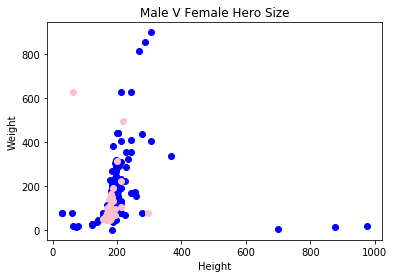

In [30]:
plt.scatter(xm, ym , color = 'blue')
plt.scatter(xf,yf, color = 'pink')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Male V Female Hero Size')
plt.show()

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [33]:
import seaborn as sns
male_heroes_df = male_df
female_heroes_df = female_df

def show_distplot(dataframe, gender, column_name):
    if gender == 'Male':
        sns.distplot(dataframe[column_name],color = 'blue')
    elif gender == 'Female':
        sns.distplot(dataframe[column_name], color = 'pink')
    else:
        'Gender not in  table'

C:\Users\sardi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


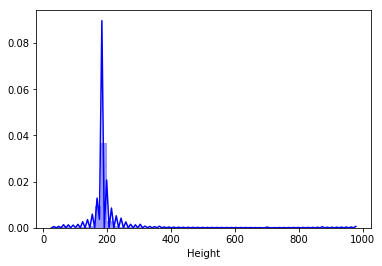

In [34]:
# Male Height
show_distplot(male_heroes_df, 'Male','Height')

C:\Users\sardi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


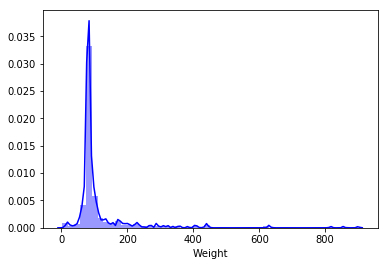

In [35]:
# Male Weight
show_distplot(male_heroes_df, 'Male','Weight')

C:\Users\sardi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


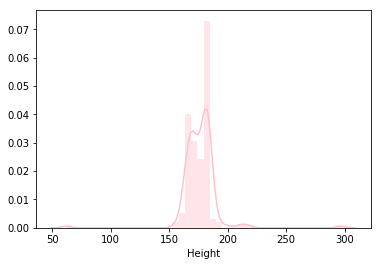

In [36]:
# Female Height
show_distplot(female_heroes_df, 'Female','Height')

C:\Users\sardi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


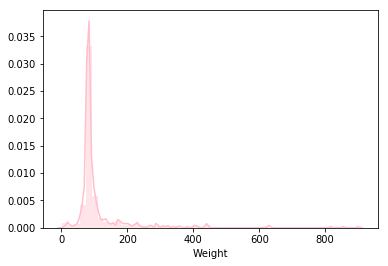

In [37]:
# Female Weight
show_distplot(male_heroes_df, 'Female','Weight')

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________
I didnt realize height was messy as well as weight until I saw the graphs.  Also i notice thatmale super heores are bigger in all dimensions on averge vs female  Female's height also has a tihgter distribution more closdely centered on themean than men with less skew



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [38]:
#convert True to 1 and false to 0
power = powers*1

In [39]:
power.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A-Bomb,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abe Sapien,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abin Sur,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abomination,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
power.loc[:, 'no_of_powers'] = power.iloc[:, 1:].sum(axis=1)

In [41]:
powerful_hero=power[['hero_names','no_of_powers']]

In [43]:
#top 5 overall by powers
powerful_hero = powerful_hero.sort_values(by='no_of_powers', ascending=False)
powerful_hero[:5]

,hero_names,no_of_powers
563,Spectre,49.0
18,Amazo,44.0
394,Martian Manhunter,35.0
370,Living Tribunal,35.0
388,Man of Miracles,34.0


In [49]:
clean_hero = info.merge(powerful_hero, how = 'inner', left_on='name', right_on='hero_names' )
clean_hero.drop('hero_names', axis=1, inplace=True)
clean_hero.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,no_of_powers
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,Other Publisher,good,441.0,7.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,16.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,1.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,Other Publisher,bad,441.0,8.0
4,Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,Other Publisher,bad,81.0,14.0


In [51]:
marvel_data = clean_hero[clean_hero['Publisher']=='Marvel Comics']
marvel_data.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,no_of_powers
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,Other Publisher,good,441.0,7.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,Other Publisher,bad,441.0,8.0
4,Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,Other Publisher,bad,81.0,14.0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,Other Publisher,bad,122.0,11.0
8,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,Other Publisher,good,81.0,1.0


In [52]:
marvel_data = marvel_data.sort_values(by='no_of_powers', ascending=False)
marvel_data[:5]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,no_of_powers
366,Living Tribunal,Other Publisher,blue,Cosmic Entity,No Hair,183.0,Marvel Comics,gold,neutral,81.0,35.0
141,Captain Marvel,Female,blue,Human-Kree,Blond,180.0,Marvel Comics,Other Publisher,good,74.0,33.0
245,Galactus,Male,black,Cosmic Entity,Black,876.0,Marvel Comics,Other Publisher,neutral,16.0,32.0
448,Odin,Male,blue,God / Eternal,White,206.0,Marvel Comics,Other Publisher,good,293.0,31.0
452,One-Above-All,Other Publisher,Other Publisher,Cosmic Entity,Other Publisher,183.0,Marvel Comics,Other Publisher,neutral,81.0,31.0


In [53]:
dc_data = clean_hero[clean_hero['Publisher']=='DC Comics']
dc_data.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,no_of_powers
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,1.0
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,Other Publisher,good,88.0,10.0
12,Alan Scott,Male,blue,Other Publisher,Blond,180.0,DC Comics,Other Publisher,good,90.0,13.0
17,Amazo,Male,red,Android,Other Publisher,257.0,DC Comics,Other Publisher,bad,173.0,44.0
25,Animal Man,Male,blue,Human,Blond,183.0,DC Comics,Other Publisher,good,83.0,5.0


In [54]:
dc_data = dc_data.sort_values(by='no_of_powers', ascending=False)
dc_data[:5]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,no_of_powers
555,Spectre,Male,white,God / Eternal,No Hair,183.0,DC Comics,white,good,81.0,49.0
17,Amazo,Male,red,Android,Other Publisher,257.0,DC Comics,Other Publisher,bad,173.0,44.0
388,Martian Manhunter,Male,red,Martian,No Hair,201.0,DC Comics,green,good,135.0,35.0
142,Captain Marvel,Male,blue,Human,Black,193.0,DC Comics,Other Publisher,good,101.0,33.0
414,Mister Mxyzptlk,Male,Other Publisher,God / Eternal,Other Publisher,183.0,DC Comics,Other Publisher,bad,81.0,31.0


Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

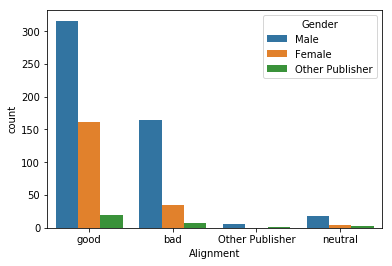

In [75]:
#alighnment by gender - nearly equally likely to be a bad guy or a good woman
sns.countplot(x='Alignment', data=info, hue='Gender')

In [76]:
#gender distribution within major Comic publisher
gender_series = marvel_data['Gender'].value_counts()
gender = list(gender_series.index)
gender_percentage = list((gender_series/gender_series.sum())*100)

dc_gender_series = dc_data['Gender'].value_counts()
dc_gender = list(dc_gender_series.index)
dc_distribution = list((dc_gender_series/dc_gender_series.sum())*100)

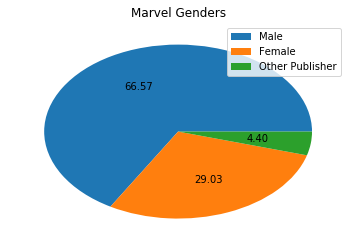

In [93]:
plt.pie(gender_percentage, autopct='%.2f')
plt.title("Marvel Genders")
plt.legend(gender)


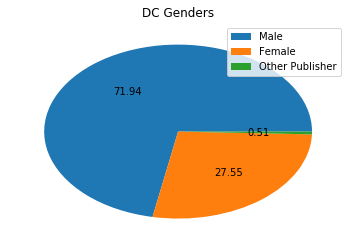

In [94]:
plt.pie(dc_distribution, autopct='%.2f')
plt.title("DC Genders")
plt.legend(dc_gender)

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data